<a href="https://colab.research.google.com/github/Rashed-35/Rashed-ST-16035/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving iris1.csv to iris1 (1).csv
Dataset Preview:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Missing values in dataset:
 sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00     

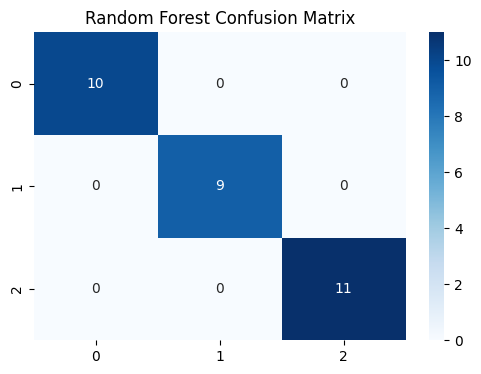


Models and Scaler saved successfully!

Sample Predictions: ['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor']


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import os

# Load dataset (Upload iris1.csv to Colab or provide correct path)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("iris1.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# Encode target variable
y = df.iloc[:, -1]  # Target column
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Convert categorical labels to numbers

# Define features
X = df.iloc[:, :-1]  # All columns except the last one

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training: Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Model Training: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Save models & scaler
os.makedirs("models", exist_ok=True)
pickle.dump(rf_clf, open("models/rf_model.sav", "wb"))
pickle.dump(log_reg, open("models/log_model.sav", "wb"))
pickle.dump(scaler, open("models/scaler.sav", "wb"))
pickle.dump(encoder, open("models/label_encoder.sav", "wb"))
print("\nModels and Scaler saved successfully!")

# Load and test the saved model
loaded_model = pickle.load(open("models/rf_model.sav", "rb"))
sample_data = X_test[:5]  # Take first 5 test samples
sample_predictions = loaded_model.predict(sample_data)
print("\nSample Predictions:", encoder.inverse_transform(sample_predictions))


In [60]:
# Load the trained Random Forest model and scaler
loaded_model = pickle.load(open("models/rf_model.sav", "rb"))
scaler = pickle.load(open("models/scaler.sav", "rb"))
encoder = pickle.load(open("models/label_encoder.sav", "rb"))

# Take user input for flower measurements
print("\nEnter flower measurements:")
sepal_length = float(input("Sepal Length: "))
sepal_width = float(input("Sepal Width: "))
petal_length = float(input("Petal Length: "))
petal_width = float(input("Petal Width: "))

# Create an input array
user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Scale the input data using the saved scaler
user_input_scaled = scaler.transform(user_input)

# Make prediction
prediction = loaded_model.predict(user_input_scaled)

# Convert prediction back to species name
predicted_species = encoder.inverse_transform(prediction)

# Print the result
print("\nPredicted Species:", predicted_species[0])



Enter flower measurements:
Sepal Length: 3
Sepal Width: 4
Petal Length: 2
Petal Width: 1

Predicted Species: Setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
